In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, Graph, START, END
from langgraph.graph.message import add_messages
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.prebuilt import tools_condition, ToolNode
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
import os
from AllTools import tools
load_dotenv("/home/kamal/.env")

True

In [2]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash",api_key=os.getenv("GOOGLE_API_KEY"))

In [3]:
# Tool binding
llm_with_tools = llm.bind_tools(tools)

------------------

In [4]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [5]:
def chatbot(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

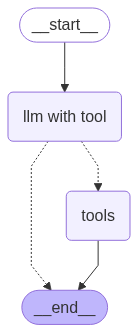

In [6]:
graph_builder = StateGraph(State)

graph_builder.add_node("llm with tool", chatbot)
graph_builder.add_node("tools", ToolNode(tools))


graph_builder.add_edge(START, "llm with tool")
graph_builder.add_conditional_edges("llm with tool",tools_condition)
graph_builder.add_edge("tools", END)

graph = graph_builder.compile()
graph

In [7]:
response = graph.invoke({"messages":[{"role":"user","content":"What is the capital of France? and tell me about the weather there"}]})

In [8]:
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (6d864df7-fba8-4620-ae0e-6210b75ab4ce)
 Call ID: 6d864df7-fba8-4620-ae0e-6210b75ab4ce
  Args:
    query: What is the capital of France?
None
================================= Tool Message =================================
Name: tavily_search

{"query": "What is the capital of France?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves

### ReAct

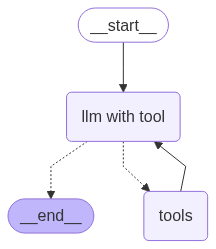

In [9]:
graph_builder_2 = StateGraph(State)

graph_builder_2.add_node("llm with tool", chatbot)
graph_builder_2.add_node("tools", ToolNode(tools))


graph_builder_2.add_edge(START, "llm with tool")
graph_builder_2.add_conditional_edges("llm with tool",tools_condition)
graph_builder_2.add_edge("tools", "llm with tool")

graph = graph_builder_2.compile()
graph

In [10]:
response = graph.invoke({"messages":[{"role":"user","content":"What is the capital of France? and tell me about the weather there"}]})
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================

The capital of France is Paris.
Tool Calls:
  get_weather (d5174536-f01d-46d8-8cc7-404dd319fe05)
 Call ID: d5174536-f01d-46d8-8cc7-404dd319fe05
  Args:
    city: Paris
None
================================= Tool Message =================================
Name: get_weather

{"coord": {"lon": 2.3488, "lat": 48.8534}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01d"}], "base": "stations", "main": {"temp": 290.11, "feels_like": 289.64, "temp_min": 290.11, "temp_max": 290.11, "pressure": 1023, "humidity": 68, "sea_level": 1023, "grnd_level": 1013}, "visibility": 10000, "wind": {"speed": 0.47, "deg": 329, "gust": 0.46}, "clouds": {"all": 6}, "dt": 1752045597, "sys": {"country": "FR", "sunrise": 1752033432, "sunset": 1752090843}

In [11]:
response = graph.invoke({"messages":[{"role":"user", 
                                      "content":"""What is the capital of France? can you multiply the multiply the temprature in C with 1 currency of there converted to Indian currency"""}]})
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? can you multiply the multiply the temprature in C with 1 currency of there converted to Indian currency
None
================================== Ai Message ==================================
Tool Calls:
  get_weather (9eed3ce5-d2bb-4dba-a1f8-30beb00cf3c7)
 Call ID: 9eed3ce5-d2bb-4dba-a1f8-30beb00cf3c7
  Args:
    city: Paris
  get_conversion_factor (d8bf5c4b-e807-4d92-b2b1-687be50e0206)
 Call ID: d8bf5c4b-e807-4d92-b2b1-687be50e0206
  Args:
    target_currency: INR
    base_currency: EUR
None
================================= Tool Message =================================
Name: get_weather

{"coord": {"lon": 2.3488, "lat": 48.8534}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01d"}], "base": "stations", "main": {"temp": 290.11, "feels_like": 289.64, "temp_min": 290.11, "temp_max": 290.11, "pressure": 1023, "humidity": 68, "sea_level": 1023, "

In [12]:
response = graph.invoke({"messages":[{"role":"user", 
                                      "content":"296.58 K to C"}]})
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

296.58 K to C
None
================================== Ai Message ==================================
Tool Calls:
  calculator (477fbdae-36ba-46bb-b955-ef5184a344dd)
 Call ID: 477fbdae-36ba-46bb-b955-ef5184a344dd
  Args:
    equation: 296.58 - 273.15
None
================================= Tool Message =================================
Name: calculator

23.430000000000007
None
================================== Ai Message ==================================

296.58 K is 23.43°C.
None


In [13]:
response = graph.invoke({"messages":[{"role":"user", 
                                      "content":"296.58 F to C"}]})
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

296.58 F to C
None
================================== Ai Message ==================================
Tool Calls:
  calculator (0c56e706-3c3d-4e4f-a95e-117cd059552e)
 Call ID: 0c56e706-3c3d-4e4f-a95e-117cd059552e
  Args:
    equation: (296.58 - 32) * 5 / 9
None
================================= Tool Message =================================
Name: calculator

146.98888888888888
None
================================== Ai Message ==================================

296.58°F is equal to 146.99°C.
None


### With Memory

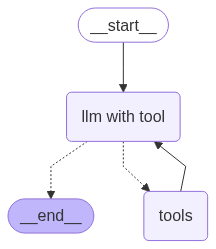

In [14]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

def chatbot(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


memory = MemorySaver()

graph_builder_3 = StateGraph(State)

graph_builder_3.add_node("llm with tool", chatbot)
graph_builder_3.add_node("tools", ToolNode(tools))


graph_builder_3.add_edge(START, "llm with tool")
graph_builder_3.add_conditional_edges("llm with tool",tools_condition)
graph_builder_3.add_edge("tools", "llm with tool")

graph = graph_builder_3.compile(checkpointer=memory)
graph

In [16]:
config={"configurable":{"thread_id":"1"}}
response = graph.invoke({"messages":[{"role":"user","content":"What is the capital of France? and tell me about the weather there"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [17]:
response['messages'][-1].content

'The capital of France is Paris. Would you like to know about the weather in Paris?'

In [18]:
response = graph.invoke({"messages":[{"role":"user","content":"My name is Kamal"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [19]:
response = graph.invoke({"messages":[{"role":"user","content":"what is the weather in balasore multiplied with 2"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [20]:
response = graph.invoke({"messages":[{"role":"user","content":"convert it to C"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [21]:
response = graph.invoke({"messages":[{"role":"user","content":"what is 598.94 converted to C"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [22]:
response = graph.invoke({"messages":[{"role":"user","content":"who am i"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [23]:
response = graph.invoke({"messages":[{"role":"user","content":"did you forget my name?"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 

In [24]:
response = graph.invoke({"messages":[{"role":"user","content":"then why did you denied last time?"}]},
                        config=config)
for i in response['messages']:
    print(i.pretty_print())

================================ Human Message =================================

What is the capital of France? and tell me about the weather there
None
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ec1c3827-55fd-4cd8-b637-90a6aeb0759b)
 Call ID: ec1c3827-55fd-4cd8-b637-90a6aeb0759b
  Args:
    query: capital of France
None
================================= Tool Message =================================
Name: tavily_search

{"query": "capital of France", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://home.adelphi.edu/~ca19535/page%204.html", "title": "Paris facts: the capital of France in history", "content": "Paris, France Paris facts: Paris, the capital of France Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris is a world capital city of shopping and fashion, with Channel, Dior, Vuitton, Yves Saint Laurent among many 